## 3. 회귀분석

### (1) 주가 데이터를 이용한 회귀분석

기울기 :  [[0.63482159]]
절편 :  [0.12628453]
결정계수 :  0.1064571423759525


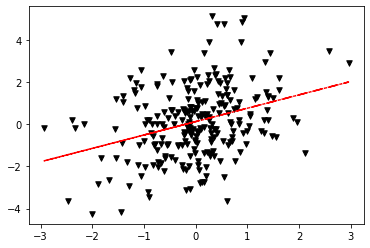

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

#데이터를 읽어옴
h_stock = pd.read_csv('H_stock.csv')
s_stock = pd.read_csv('S_stock.csv')
k_index = pd.read_csv('K_index.csv')

#헤더정보를 제거함
h_rate = np.array(h_stock.h_rate[1:]) # ( = h_stock['h_rate'].iloc[1:] )H회사의 주가지수
s_rate = np.array(s_stock.s_rate[1:]) # S회사의 주가지수
k_rate = np.array(k_index.k_rate[1:]) # 코스피 지수

#선형회귀모델함수에 넣기 위하여 reshape으로 차원조정[예:(248,) --> (248,1)]
h_rate = h_rate.reshape(h_rate.shape[0],1) 
s_rate = s_rate.reshape(s_rate.shape[0],1) 
k_rate = k_rate.reshape(k_rate.shape[0],1)

plt.scatter(k_rate, h_rate, c='black', s=30, marker='v',label='train')

model = linear_model.LinearRegression() # 모델 생성
model.fit(k_rate, h_rate) # k_rate: 독립변수, h_rate: 종속변수 / 학습

plt.plot(k_rate, model.predict(k_rate), linestyle='-.',label='h stock' , c='red')

print('기울기 : ' , model.coef_) # 회귀분석의 기울기는 매우 중요함
print('절편 : ' , model.intercept_) 
print('결정계수 : ' , model.score(k_rate, h_rate)) # 평가 대상 지표(결정계수)

**Insight**

기울기 = 0.63: 코스피 지수와 H회사의 주가지수는 서로 63%의 영향력이 있다.

In [4]:
h_stock.head()

,date,h_price,h_rate
0,2015-03-25,45500,NaN
1,2015-03-26,45900,0.879
2,2015-03-27,45000,-1.961
3,2015-03-30,45600,1.333
4,2015-03-31,46000,0.877


In [3]:
k_rate

array([[-0.991],
       [-0.136],
       [ 0.507],
       [ 0.541],
       [-0.616],
       [ 0.031],
       [ 0.806],
       [ 0.049],
       [ 0.029],
       [ 0.597],
       [-0.019],
       [ 1.403],
       [ 0.535],
       [ 0.61 ],
       [ 0.39 ],
       [ 0.941],
       [ 0.168],
       [ 0.15 ],
       [-0.089],
       [-0.042],
       [ 1.377],
       [-0.626],
       [-0.105],
       [-0.457],
       [-0.235],
       [-0.722],
       [ 0.238],
       [-1.297],
       [-0.645],
       [-0.262],
       [ 0.569],
       [-0.029],
       [ 0.829],
       [ 0.292],
       [-0.652],
       [ 0.343],
       [ 0.337],
       [ 0.881],
       [-0.782],
       [ 1.097],
       [-0.121],
       [-1.679],
       [ 0.161],
       [ 0.185],
       [-0.588],
       [-1.129],
       [-0.745],
       [ 0.47 ],
       [-0.23 ],
       [-0.141],
       [-0.056],
       [-0.616],
       [ 0.258],
       [-0.216],
       [-0.48 ],
       [-0.666],
       [ 0.303],
       [ 0.345],
       [ 0.249

기울기 :  [[1.00132771]]
절편 :  [-0.03500143]
결정계수 :  0.2644483831226937


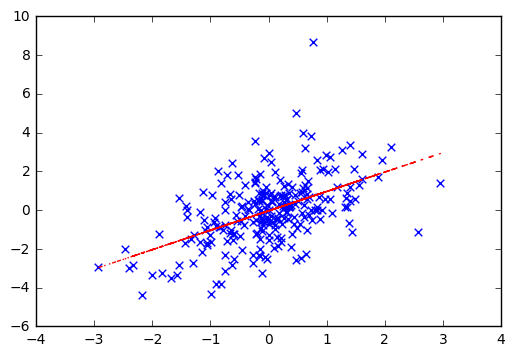

In [2]:
plt.scatter(k_rate, s_rate, c='blue', s=30, marker='x',label='s rate')

model = linear_model.LinearRegression()
model.fit(k_rate, s_rate)

plt.plot(k_rate, model.predict(k_rate), linestyle='-.',label='h stock' , c='red')

print('기울기 : ' , model.coef_) 
print('절편 : ' , model.intercept_) 
print('결정계수 : ' , model.score(k_rate, s_rate))


**Insight**

기울기 = 1.0: 코스피 지수가 H회사보다 S회사의 주가지수에 미치는 영향력이 더 크다.

### (2) 비선형 회귀모델을 파이썬으로 나타내기

In [7]:
from sklearn import linear_model
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

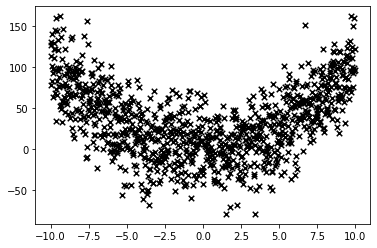

In [8]:
#2차 회귀모형을 만들기 위한 가짜데이터 radndom생성(표준정규분포) 
x_train = np.arange(-10, +10, 1/50.).reshape(-1,1)
x_train.shape
x_train2 = x_train**2 + np.random.randn(len(x_train), 1) * 30

plt.scatter(x_train, x_train2, c='black', s=30, marker='x',label='sample')

# 회귀모형에 넣기 위한 트레이닝 데이터셋 만들기 
X2_TRAIN = np.c_[x_train**2, x_train]

[[1.04639491 0.06138623]]
[-0.83438156]
0.5211045163944111


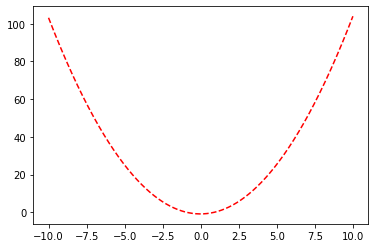

In [9]:
# 모델을 제작하고 훈련하기
model = linear_model.LinearRegression()
model.fit(X2_TRAIN, x_train2)

# 모델을 사용하여 예측함
plt.plot(x_train, model.predict(X2_TRAIN), linestyle='--',label='sample' , c='red')

print(model.coef_) 
print(model.intercept_) 
print(model.score(X2_TRAIN, x_train2))

In [15]:
a = np.array([1,2,3])
b = np.array([4,5,6])

np.c_[a, b]

array([[1, 4],
       [2, 5],
       [3, 6]])

---

### 실습 문제

442 명의 당뇨병 환자 각각에 대해 10 개의 기준 변수, 연령, 성별, 체질량 지수, 평균 혈압 및 6 개의 혈청 측정 값

In [17]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# 당뇨병 환자의 데이터 로드
diabetes = datasets.load_diabetes()

In [18]:
diabetes.data.shape, diabetes.data, len(diabetes)

((442, 10),
 array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 7)

In [19]:
diabetes_X = diabetes.data[:, 2].reshape(len(diabetes.data), 1)

In [20]:
diabetes_X.shape, diabetes_X

((442, 1),
 array([[ 0.06169621],
        [-0.05147406],
        [ 0.04445121],
        [-0.01159501],
        [-0.03638469],
        [-0.04069594],
        [-0.04716281],
        [-0.00189471],
        [ 0.06169621],
        [ 0.03906215],
        [-0.08380842],
        [ 0.01750591],
        [-0.02884001],
        [-0.00189471],
        [-0.02560657],
        [-0.01806189],
        [ 0.04229559],
        [ 0.01211685],
        [-0.0105172 ],
        [-0.01806189],
        [-0.05686312],
        [-0.02237314],
        [-0.00405033],
        [ 0.06061839],
        [ 0.03582872],
        [-0.01267283],
        [-0.07734155],
        [ 0.05954058],
        [-0.02129532],
        [-0.00620595],
        [ 0.04445121],
        [-0.06548562],
        [ 0.12528712],
        [-0.05039625],
        [-0.06332999],
        [-0.03099563],
        [ 0.02289497],
        [ 0.01103904],
        [ 0.07139652],
        [ 0.01427248],
        [-0.00836158],
        [-0.06764124],
        [-0.0105172 ],


In [24]:
# 트레이닝 데이터와 테스트 데이터를 나눔

diabetes_X_train = diabetes_X[:-20] # 앞의 전체 -20
diabetes_X_test = diabetes_X[-20:] # 뒤의 전체 -20

diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [25]:
regr = linear_model.LinearRegression() # 모델 생성
regr.fit(diabetes_X_train, diabetes_y_train) # 모델 학습

LinearRegression()

In [26]:
diabetes_y_pred = regr.predict(diabetes_X_test)

In [27]:
diabetes_y_pred

array([225.9732401 , 115.74763374, 163.27610621, 114.73638965,
       120.80385422, 158.21988574, 236.08568105, 121.81509832,
        99.56772822, 123.83758651, 204.73711411,  96.53399594,
       154.17490936, 130.91629517,  83.3878227 , 171.36605897,
       137.99500384, 137.99500384, 189.56845268,  84.3990668 ])

In [28]:
# 회귀계수
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [938.23786125]


In [29]:
# 결정계수
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Variance score: 0.47


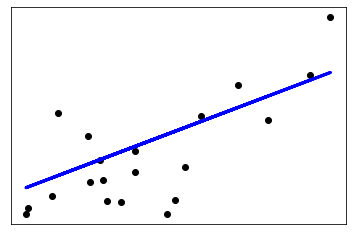

In [30]:
plt.scatter(diabetes_X_test, diabetes_y_test, color = 'black')
plt.plot(diabetes_X_test, diabetes_y_pred, color = 'blue', linewidth=3) # 회귀직선

plt.xticks(())
plt.yticks(())

plt.show()

---

**reshape( -1, 정수 )** 의미

열(column)' 차원의 '정수'에 따라서 원소가 빠짐없이 배치될 수 있도록 '-1'이 들어가 있는 '행(row)' 의 개수가 가변적으로 정해진다. 
즉, 정수는 열의 개수를 의미한다.

출처: https://rfriend.tistory.com/345 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]

In [68]:
np.arange(12).reshape(-1,1)

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11]])

In [69]:
np.arange(12).reshape(-1,4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

---

**np.random.randn(m, n)** 의미

평균0, 표준편차1의 표준정규분포 난수를 matrix array(m,n) 형식으로 생성한다.

출처: https://nittaku.tistory.com/443

In [76]:
np.random.randn(2, 3)

array([[ 1.19802523,  1.66810991, -1.82646527],
       [ 1.3758994 , -0.79207926, -1.04698507]])

---

**np.c_** 정의

두 개의 1차원 배열을 칼럼으로 세로로 붙여서 2차원 배열 만들기

출처: https://rfriend.tistory.com/352 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]

---

**np.r_** 정의

두 배열을 왼쪽에서 오른쪽으로 붙이기

In [20]:
np.r_[a,b]

array([1, 2, 3, 4, 5, 6])

In [21]:
# 두 배열을 위에서 아래로 붙이기
np.r_[[a], [b]]

array([[1, 2, 3],
       [4, 5, 6]])

---

**np.arange()**

In [5]:
import numpy as np
np.arange(10)[-5:], np.arange(20)[:-5]

(array([5, 6, 7, 8, 9]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]))

---
---

# [온아아리포 강의]

# 예측모델

보스턴 집값 예측을 위한 모델을 생성하여 선형회귀를 사용하여 생성해봅니다 

[분석데이터] https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html?highlight=boston#sklearn.datasets.load_boston

## 1. 기본 예측모델(LinearRegression)

### 라이브러리 로딩

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston

### 데이터 로딩

In [2]:
boston = load_boston()

boston_df = pd.DataFrame(boston.data , columns = boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### EDA

In [3]:
boston_df.shape

(506, 14)

In [4]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### 데이터분할

In [7]:
from sklearn.model_selection import train_test_split

y = boston_df['PRICE']
X = boston_df.drop(['PRICE'],axis=1,inplace=False) # = boston_df.lioc[:, :-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 학습

In [8]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()  # 모델 생성
lr_model.fit(X_train, y_train) # 모델 학습

print('weight:', lr_model.coef_)
print('bias:',lr_model.intercept_)

weight: [-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
 -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
  2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
 -5.47113313e-01]
bias: 31.63108403569186


In [9]:
pd.Series(data=np.round(lr_model.coef_, 1), index=X.columns )

CRIM       -0.1
ZN          0.0
INDUS       0.0
CHAS        3.1
NOX       -15.4
RM          4.1
AGE        -0.0
DIS        -1.4
RAD         0.2
TAX        -0.0
PTRATIO    -0.9
B           0.0
LSTAT      -0.5
dtype: float64

### 평가

- 모델의 성능을 확인하기 위한 지표: mse, rmse, r2
- SSE: 실제값과 예측값의 차이의 제곱합
- SSR: 실제값의 평균과 예측값의 차이의 제곱합
- SST: 실제 데이터 전체의 분산
- MSE: 실제값과 예측값의 차이를 제곱하여 평균 계산(차이가 작을수록 MSE값이 작음, 제곱근 값인 RMSE도 활용, 0에 가까울수록 좋음)
- MSE는 하나의 값으로 판단하는 것이 아니라 여러 회귀모델을 만들고 나온 MSE값들을 비교하여 가장 작은 값을 갖는 모델을 선택하는 방식으로 이용된다.

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

y_preds = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_preds)

print('MSE : {0:.3f} , RMSE : {1:.3f}, r2 : {2:.3f}'.format(mse , rmse, r2))

MSE : 21.517 , RMSE : 4.639, r2 : 0.711


In [13]:
score = lr_model.score(X_test, y_test)
score

0.7112260057484903

In [7]:
result = pd.DataFrame({'y': y_test.values, 'y_pred': y_preds, 'diff': np.abs(y_test.values - y_preds)}) # 차이의 절댓값
result.sort_values(by=['diff'], ascending=False)

,y,y_pred,diff
96,50.0,24.822491,25.177509
97,17.9,-0.477121,18.377121
12,7.0,-6.865435,13.865435
94,27.5,14.032417,13.467583
32,15.0,25.313725,10.313725
...,...,...,...
72,10.8,10.943170,0.143170
62,31.5,31.635220,0.135220
139,15.6,15.466213,0.133787
7,14.0,14.078599,0.078599


<AxesSubplot:>

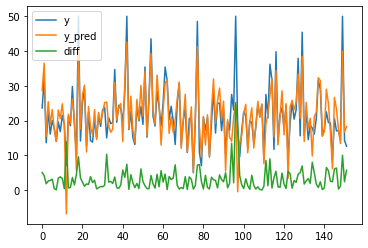

In [11]:
result.plot()

## 2. 교차검증(cross_validate)

scoring을 진행할 때 "mean_squared_error" 앞에 "neg_"을 넣는다. mean_squared_error는 작을수록 좋은 모델이다. 

하지만 socre는 높으면 높을수록 좋은 모델이라는 정책을 따르고 있어서 "negative"를 의미하는 "neg_"를 붙인다.

In [8]:
from sklearn.model_selection import cross_validate

# cv: 3개의 train, test set fold 로 나누어 학습 (회귀모델이 3개 만들어짐)
scores = cross_validate(lr_model, X, y, scoring="neg_mean_squared_error", # scoring 매개변수에 원하는 평가 지표 지정
                        cv=3, return_train_score=True, return_estimator=True)
scores

{'fit_time': array([0.02214456, 0.00552893, 0.01108646]),
 'score_time': array([0.        , 0.00334692, 0.        ]),
 'estimator': [LinearRegression(), LinearRegression(), LinearRegression()],
 'test_score': array([ -20.63230588,  -34.48294871, -451.90968255]),
 'train_score': array([-25.48944924, -21.28413033,  -9.09058754])}

In [9]:
mse = (-1 * scores['train_score'])
mse

array([25.48944924, 21.28413033,  9.09058754])

In [10]:
rmse  = np.sqrt(-1 * scores['train_score'])
rmse

array([5.04870768, 4.6134727 , 3.01506012])

In [11]:
print('RMSE 평균: {0:.3f} '.format(np.mean(rmse)))

RMSE 평균: 4.226 


## 3. 다양한 분류모델

In [12]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(n_estimators=100, random_state=42) # 나무개수 100개 설정
forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)

LGBMRegressor(random_state=42)

In [14]:
model_list = [lr_model, forest_model, lgb_model]

for model in model_list:
    model.fit(X_train , y_train)
    y_preds = model.predict(X_test)
    mse = mean_squared_error(y_test, y_preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_preds)
    model_name = model.__class__.__name__
    print('{0} MSE : {1:.3f} , RMSE : {2:.3f}, r2 : {3:.3f}'.format(model_name, mse , rmse, r2)) 

LinearRegression MSE : 21.517 , RMSE : 4.639, r2 : 0.711
RandomForestRegressor MSE : 9.620 , RMSE : 3.102, r2 : 0.871
LGBMRegressor MSE : 11.346 , RMSE : 3.368, r2 : 0.848


## 4. 조기종료(early stop)

In [19]:
from lightgbm import LGBMRegressor

lgb_model2 = LGBMRegressor(n_estimators=100)
evals = [(X_test, y_test)]
lgb_model2.fit(X_train, y_train, early_stopping_rounds=10, eval_set=evals)
y_preds = lgb_model2.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_preds)
print('MSE : {0:.3f} , RMSE : {1:.3f}, r2 : {2:.3f}'.format(mse , rmse, r2))

[1]	valid_0's l2: 65.7162
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 56.7131
[3]	valid_0's l2: 49.159
[4]	valid_0's l2: 43.0422
[5]	valid_0's l2: 37.9557
[6]	valid_0's l2: 33.7043
[7]	valid_0's l2: 30.4385
[8]	valid_0's l2: 27.9803
[9]	valid_0's l2: 25.8819
[10]	valid_0's l2: 23.9016
[11]	valid_0's l2: 22.4884
[12]	valid_0's l2: 20.871
[13]	valid_0's l2: 19.5505
[14]	valid_0's l2: 18.6695
[15]	valid_0's l2: 17.8842
[16]	valid_0's l2: 17.1739
[17]	valid_0's l2: 16.6865
[18]	valid_0's l2: 16.1623
[19]	valid_0's l2: 15.5649
[20]	valid_0's l2: 15.4219
[21]	valid_0's l2: 15.0994
[22]	valid_0's l2: 14.8441
[23]	valid_0's l2: 14.5592
[24]	valid_0's l2: 14.3818
[25]	valid_0's l2: 14.2751
[26]	valid_0's l2: 14.1703
[27]	valid_0's l2: 13.9673
[28]	valid_0's l2: 13.8556
[29]	valid_0's l2: 13.6974
[30]	valid_0's l2: 13.5266
[31]	valid_0's l2: 13.4615
[32]	valid_0's l2: 13.3362
[33]	valid_0's l2: 13.319
[34]	valid_0's l2: 13.1923
[35]	valid_0's l2: 13.1317
[36]	v